In [ ]:
#Sentimentanalyse 
#Nach https://mechlab-engineering.de/2014/05/german-tatort-on-twitter-natural-language-processing-and-sentiment-analysis-with-python-pandas-and-nltk/

In [51]:
import pandas as pd
df2 = pd.read_csv("tatortmurot.csv", header=0, sep=";")

df2.set_index('date', inplace=True)
df2.rename(columns={"tweet": "text"},  inplace=True)

df2.index.name = 'Zeit'

df3=df2[(df2.index > '2020-11-22 19:14:35')].drop_duplicates()

In [52]:
#df3
df3.sort_values(by=['Zeit'],ascending=True)
#print(df3)

,text
Zeit,
2020-11-22 19:14:40,heute #doubleimpact oder #doubleteam mit #mur...
2020-11-22 19:14:42,ich habe jetzt eine verabredung mit monsieur m...
2020-11-22 19:14:44,@tatort @daserste ohne uns\nman sieht schon in...
2020-11-22 19:14:51,"wein, weib, #tatort - jetzt!"
2020-11-22 19:15:00,murot-time (zum insgesamt neunten mal). immer ...
...,...
2020-11-22 23:35:48,rt @tatort: wie hat euch der tatort heute gefa...
2020-11-22 23:36:29,"rt @tatort: der gesichtsausdruck, wenn du weiß..."
2020-11-22 23:42:08,"rt @afd_muenster: wenn #jana nicht -wie der ""#..."


In [53]:
#df3.set_index("Zeit").resample("W").plot()

In [54]:
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist

text = df3['text']

In [55]:
stop_eng = stopwords.words('english')
stop_ger = stopwords.words('german')
customstopwords = ['via','mal','viele','seit','hätte','wäre','weitere','neue','kommt','wegen','wurden','der','bin','doch', '_', 'heute', 'gerade', 'erst', 'macht', 'eigentlich', 'warum', 'gibt', 'gar', 'immer', 'schon', 'beim', 'ganz', 'dass', 'wer', 'mehr', 'gleich', 'wohl']

In [56]:
tokens = []
sentences = []
for txt in text:
    sentences.append(txt.lower())
    tokens.extend([t.lower() for t in txt.split()])

    
hashtags = [w for w in tokens if w.startswith('#')]
mentions = [w for w in tokens if w.startswith('@')]
links = [w for w in tokens if w.startswith('http') or w.startswith('www')]
filtered_tokens = [w for w in tokens if not w in stop_ger and not w in stop_eng
                   and not w in customstopwords 
                   and w.isalpha() 
                   and not len(w)<3 
                   and not w in hashtags 
                   and not w in links 
                   and not w in mentions]

In [69]:
#tokens

In [70]:
freq_dist = nltk.FreqDist(filtered_tokens)
freq_dist

FreqDist({'murot': 408, 'frau': 134, 'tukur': 107, 'tatort': 82, 'geht': 80, 'ulrich': 75, 'gut': 64, 'hund': 62, 'walter': 55, 'einfach': 54, ...})

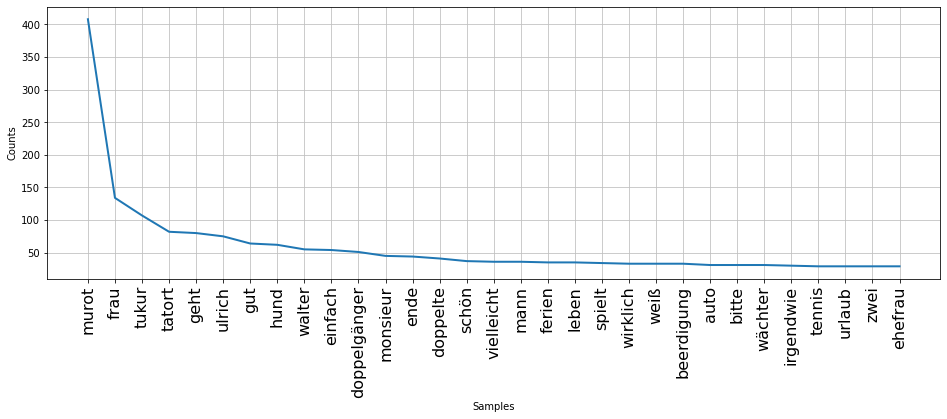

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,5))
plt.xticks(size=16)
freq_dist.plot(31)

In [72]:
tweettext = nltk.Text(filtered_tokens)
tweettext.collocations(num=50)

ferien monsieur; ulrich tukur; fertig dünn; richtigen beerdigung;
thorsten merten; beerdigung komme; eigenen beerdigung; griechischer
wein; udo jürgens; top cars; bad wildungen; monsieur hulot; letzte
woche; jacques tati; felix murot; eigenen trauerfeier; vielleicht
morgen; walter boenfeld; düst oldtimer; eilte pfau; oldtimer umher;
frau öffnet; alte dame; doppelte lottchen; nick tschiller; bücherregal
farben; pfau ständig; ständig gefeatured; dünn träumen; vertrauen
gefasst; gefeatured glaube; walters top; umher trifft; kultserie
gibts; tennis spielen; ehrlich gesagt; woche paranormalen; abhören
kabel; alleinstehend spielchen; autohandel exotischten;
automobilbranche bauen; außergewöhnlicher herausragenden; bosslevel
blockierten; browserverlauf löschen; brust digitalen; btw blond; crew
bestürzung; dativ genitiv; detaillierte untersuchung; diesmal
nachbarspaar


In [73]:
names = nltk.corpus.names

In [74]:
namen = [n.lower() for n in names.words('male.txt') or names.words('female.txt')]

namen.append('murot')
namen.append('walter')
namen.append('boenfeld')
namen.append('tukur')
namen.append('jürgens')
#namen.append('macos')






In [75]:
name_freq = nltk.FreqDist([w for w in filtered_tokens if w in namen])



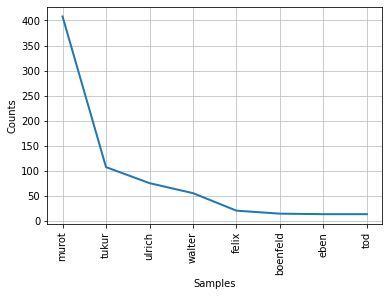

In [76]:
name_freq.plot(8)


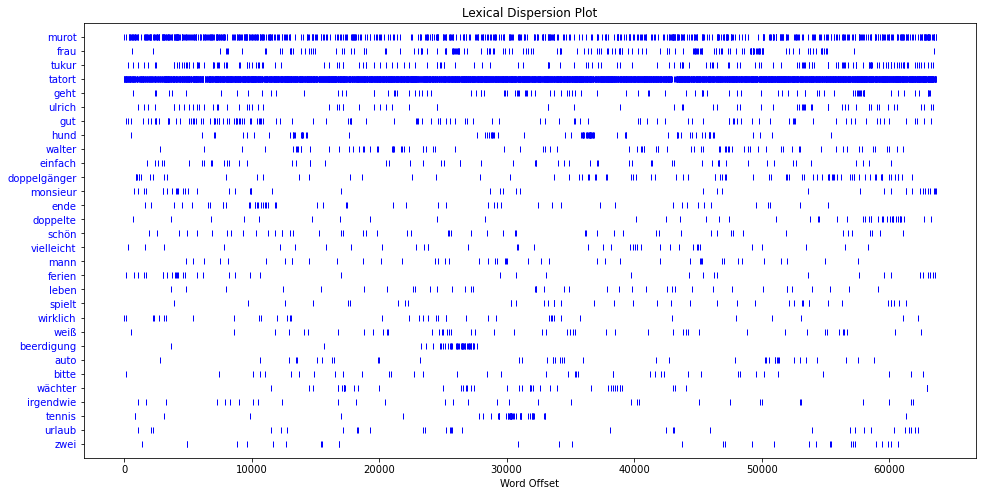

In [77]:
tweettokens = nltk.wordpunct_tokenize(str(sentences))
rawtweettext = nltk.Text(tweettokens)
#rawtweettext.concordance("praktikant")
ld = list(freq_dist)[0:30]
plt.figure(figsize=(16,8))
rawtweettext.dispersion_plot(ld)

In [78]:
#Senti with textblob

In [81]:
from textblob_de import TextBlobDE as TextBlob 
from textblob_de import PatternParser

def senti(sentence):
   
    blob=TextBlob(sentence)
    vs=blob.sentiment
    return vs

In [82]:
s =0;
ssum=0
slist = []
for i in range(len(df3.index)):
    sentence = df3['text'][i]
 #   print(sentence,senti(sentence))
    s = senti(sentence).polarity
    ssum = ssum +s
    slist.append(s)
df3['Sentiment'] = slist  
print(ssum / len(df3.index)) 

0.07341627634660408


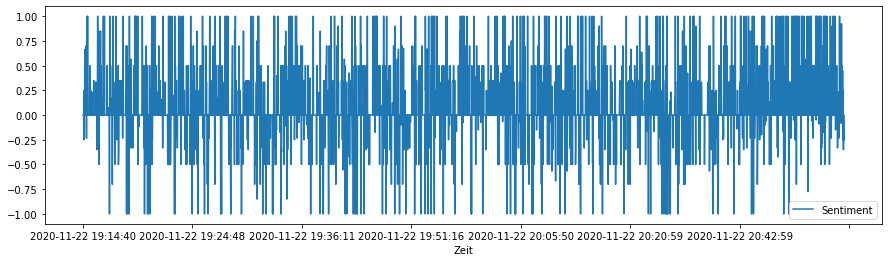

In [83]:
#df.index = pd.to_datetime(df["Date"])

from matplotlib import pyplot
import matplotlib.pylab as plb

df4 = df3.sort_index(ascending=True)

df4.plot( y=["Sentiment"],  figsize=(15,4))



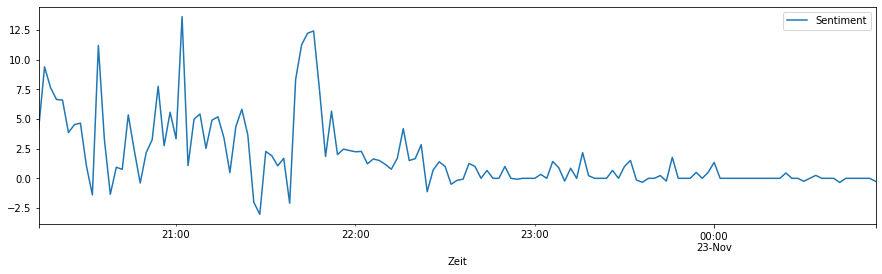

In [49]:
df4.index = pd.to_datetime(df4.index)+ pd.DateOffset(hours=+1)
df5=df4.resample('2T', level=0).sum()
df5.plot( y=["Sentiment"],  figsize=(15,4))